<a href="https://colab.research.google.com/github/RazGeghamyan/DeepLearning_projects/blob/main/practice_with_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3000x6 to 3000x1 with pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import numpy as np
import pandas as pd

np.random.seed(42)
x = np.random.randint(1,50,size = (3000,6))
y = np.random.randint(0,2,size = (3000,1))

# x = pd.DataFrame(x, columns = ['x1','x2'])
# y = pd.DataFrame(y,columns = ['target'])

# data = pd.concat((x,y),axis = 1)
# data.head()
# data.describe()

x_std = x.std()

x_mean = x.mean()

x = (x - x_mean)/np.sqrt(x_std**2 + 1e-5)

x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

class Model(nn.Module):
  def __init__(self, input_size = 6, hidden1_size = 100, hidden2_size =50,  output_size = 1):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden1_size)
    self.fc2 = nn.Linear(hidden1_size, hidden2_size)
    self.fc3 = nn.Linear(hidden2_size , output_size)
    self.batch1 = nn.BatchNorm1d(hidden1_size)
    self.batch2 = nn.BatchNorm1d(hidden2_size)
    self.batch3 = nn.BatchNorm1d(output_size)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    x = self.relu(self.batch1(self.fc1(x)))
    x = self.relu(self.batch2(self.fc2(x)))
    x = self.sigmoid((self.fc3(x)))
    return x


model = Model()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)

epochs = 10000

for epoch in range(epochs):

  y_pred = model.forward(x)

  loss = criterion(y_pred,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 1000 == 0:
    print(f'loss[{epoch + 1}] == {loss}')
  if (epoch + 1) % 10000 == 0:
    print(f'y = [{y[:5]}]')
    print(f'y_pred = [{y_pred[:5]}]')

y_pred = model.forward(x)

for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0
k = 0
for i in range(len(y_pred)):
  if y_pred[i] == y[i]:
    k += 1

accuracy = (k / len(y_pred)) * 100
print(f'accuracy = {accuracy}')

loss[1000] == 0.0835317000746727
loss[2000] == 0.032070133835077286
loss[3000] == 0.013585616834461689
loss[4000] == 0.0074653103947639465
loss[5000] == 0.005294552072882652
loss[6000] == 0.0044347262009978294
loss[7000] == 0.0040556685999035835
loss[8000] == 0.0038702802266925573
loss[9000] == 0.0037763556465506554
loss[10000] == 0.0037279322277754545
y = [tensor([[1.],
        [0.],
        [1.],
        [1.],
        [0.]])]
y_pred = [tensor([[1.0000e+00],
        [7.7209e-06],
        [9.8827e-01],
        [1.0000e+00],
        [2.2304e-03]], grad_fn=<SliceBackward0>)]
accuracy = 99.63333333333333


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

x = np.random.randint(1,50,size=(1000,3))
y = np.random.randint(0,2,size=(1000,1))

x_mean = x.mean()
x_std = x.std()

x = (x - x_mean)/x_std

x = torch.tensor(x,dtype = torch.float32)
y = torch.tensor(y,dtype = torch.float32)

class Model(nn.Module):
  def __init__(self,inpute_size = 3,hidden_size1 = 100,hidden_size2 = 50, output_size = 1 ):
    super().__init__()
    self.fc1 = nn.Linear(inpute_size,hidden_size1)
    self.fc2 = nn.Linear(hidden_size1,hidden_size2)
    self.fc3 = nn.Linear(hidden_size2,output_size)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

epochs = 1000

for epoch in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



  if (epoch + 1)%100 == 0:
    print(f'loss = {epoch +1} {loss}')

for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0
k = 0
for i in range(len(y_pred)):
  if y_pred[i] == y[i]:
    k += 1

accuracy = (k / len(y_pred)) * 100
print(f'accuracy = {accuracy}')






loss = 100 0.20900259912014008
loss = 200 0.1790757030248642
loss = 300 0.1573154628276825
loss = 400 0.14861010015010834
loss = 500 0.13036274909973145
loss = 600 0.12022311240434647
loss = 700 0.11470215022563934
loss = 800 0.10074862837791443
loss = 900 0.10143871605396271
loss = 1000 0.10053487867116928
accuracy = 87.1


## cnn mnist torch ov

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))#28x28x1 sarquma 14x14x32
        x = self.pool(F.relu(self.conv2(x)))#14x14x32 sarquma 7x7x64
        x = x.view(-1, 64 * 7 * 7)  # Flatten (3136,)
        x = F.relu(self.fc1(x))# (3136,) x (3136,128) = (128,)
        x = self.fc2(x)# (10,)
        #x = torch.softmax(self.fc2(x),dim=1)# (128,) x (128,10) = (10,)
        return x


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5)) #0 1 ov el nunyn banna
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()#grvuma vor train ani incpes sahmanvaca u orinak dropout i u batchnorm i train arvi isk testi vaxt charvi
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(images)#(64,10) vortex 64batc size
            loss = criterion(outputs, labels)#outputy tensora (64,10) labeln el (64,) lossy hashvuma u mijinacvum lossi arjeqy darnuma 1 tiv
            loss.backward()
            optimizer.step()
            running_loss += loss.item()# loss.item() vercnuma arjeqy el tensor chi
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')


def evaluate_model(model, test_loader):
    model.eval()#dropouty chexarki, batch normi el gamma betta train arac parametrery ogtagorci
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model(images)#taluya tensor (batc_size,10) vra
            _, predicted = torch.max(outputs.data, 1)# _ da max arjeqna, predictedy indexna. tenuma amenameci indxy vorna da veradarcnum. 1 dim ov aysinqn toxov nayi
            total += labels.size(0)# label.size(0) toxi qanakna veradracnum tvyal depqum batchi
            correct += (predicted == labels).sum().item()# predictedy 0ic 10 indexa u ete = exav label i tvyal tvi het uremn chisht enq gushake
    accuracy = (correct / total) * 100
    print(f'Test Accuracy: {accuracy:.2f}%')


train_model(model, train_loader, criterion, optimizer)
evaluate_model(model, test_loader)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16072038.32it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 433958.80it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4022782.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5222184.42it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/5, Loss: 0.16324858479191864
Epoch 2/5, Loss: 0.04712471116187998
Epoch 3/5, Loss: 0.032690702720288574
Epoch 4/5, Loss: 0.024275307210146084
Epoch 5/5, Loss: 0.018406055899645845
Test Accuracy: 98.98%


In [ ]:
v
v = v.view(-1, 64 * 7 * 7)

In [ ]:
import numpy as np
k = np.random.randn(7,7,64)
k.shape
k = k.flatten()
k.shape

(3136,)

In [ ]:
a = np.random.rand(3136)
b = np.random.rand(3136,128)
c = a.dot(b)
c.shape

(128,)

## iris dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import pandas as pd


In [ ]:
iris_data = load_iris()
x = iris_data.data
y = iris_data.target
x_df = pd.DataFrame(x, columns=iris_data.feature_names)
y_df = pd.DataFrame(y,columns=['species'])
data = pd.concat([x_df,y_df],axis=1)
data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
145        2  
146        2  
147        2  
148        2  
149        2  

[150 rows x 5 columns]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.tensor(x_train,dtype = torch.float32)
x_test = torch.tensor(x_test,dtype = torch.float32)
y_train = torch.tensor(y_train,dtype = torch.long)
y_test = torch.tensor(y_test,dtype = torch.long)


In [ ]:
x_train.shape

torch.Size([120, 4])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import pandas as pd

iris_data = load_iris()
x = iris_data.data
y = iris_data.target
x_df = pd.DataFrame(x, columns=iris_data.feature_names)
y_df = pd.DataFrame(y,columns=['species'])
data = pd.concat([x_df,y_df],axis=1)
data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.tensor(x_train,dtype = torch.float32)
x_test = torch.tensor(x_test,dtype = torch.float32)
y_train = torch.tensor(y_train,dtype = torch.long)
y_test = torch.tensor(y_test,dtype = torch.long)


class Iris(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(4,64)
    self.fc2 = nn.Linear(64,32)
    self.fc3 = nn.Linear(32,3)
    self.relu = nn.ReLU()

  def forward(self,x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = Iris()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.01)

def train_data(model,x_train,criterion,optimizer,epochs = 50):
  for epoch in range(epochs):
    output = model(x_train)
    loss = criterion(output,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1)%10 == 0:
      print(f'loss = {loss}')

def test_data(model,x_test):
  with torch.no_grad():
    model.eval()
    output = model(x_test)
    _, predict = torch.max(output.data,1)
    accuracy = (predict == y_test).sum().item()/y_test.size(0)

    print(f'Accuracy: {accuracy * 100}%')

train_data(model,x_train,criterion,optimizer)
test_data(model,x_test)


loss = 0.30836421251296997
loss = 0.09778616577386856
loss = 0.04896891117095947
loss = 0.043158289045095444
loss = 0.04020073637366295
Accuracy: 100.0%


## avto jnjel nkaric chi exel

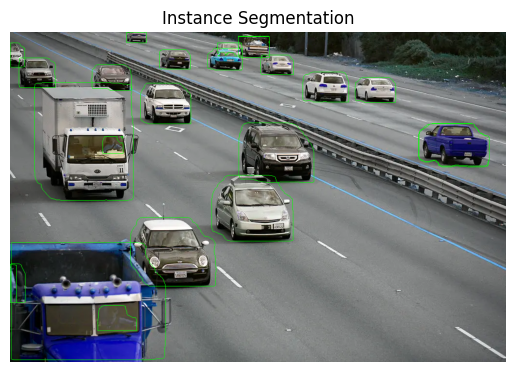

In [ ]:
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np


model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()


transform = transforms.Compose([
    transforms.ToTensor(),
])

image_path = 'cars.jpg'
input_image = Image.open(image_path).convert("RGB")
input_tensor = transform(input_image).unsqueeze(0)


with torch.no_grad():
    outputs = model(input_tensor)


masks = outputs[0]['masks']
boxes = outputs[0]['boxes']
scores = outputs[0]['scores']


threshold = 0.5
for i in range(masks.shape[0]):
    if scores[i] > threshold:
        mask = masks[i, 0].mul(255).byte().cpu().numpy()
        input_image = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(input_image, contours, -1, (0, 255, 0), 1)


plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("Instance Segmentation")
plt.axis("off")
plt.show()


## sev spitak nkary gunavor darcnel

torch.Size([1, 1, 128, 128])


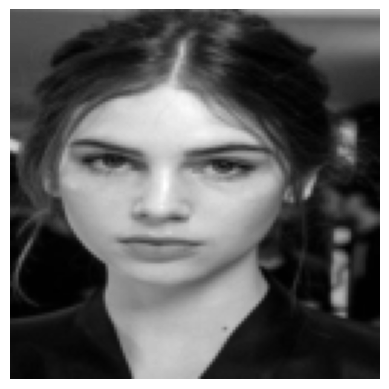

torch.Size([1, 3, 128, 128])


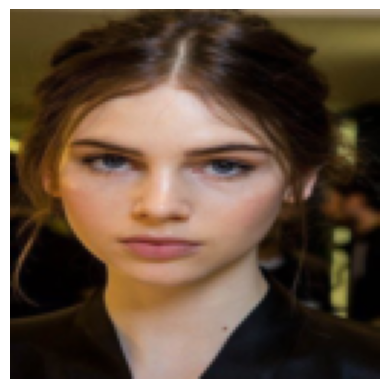

loss [0.0013497514883056283] == 0.0013


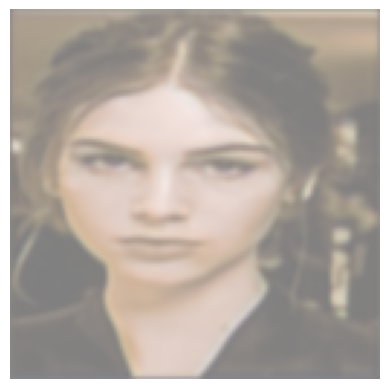

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda:4" if torch.cuda.is_available() else "cpu")

img_path = 'girl2.jpg'
img = Image.open(img_path).convert('L')

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

img_tensor = transform(img).unsqueeze(0).to(device)

print(img_tensor.shape)

img_train = np.transpose(img_tensor[0], (1, 2, 0))
img_train = (img_train * 0.5) + 0.5
plt.imshow(img_train, cmap='gray')
plt.axis('off')
plt.show()

img_path2 = 'girl2.jpg'
img2 = Image.open('girl2.jpg')

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

img_test = transform(img2).unsqueeze(0).to(device)
print(img_test.shape)

img_test1 = np.transpose(img_test[0], (1, 2, 0))
plt.imshow(img_test1)
plt.axis('off')
plt.show()

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = F.relu((self.conv1(x)))
        x = F.relu((self.conv2(x)))
        x = F.relu((self.conv3(x)))
        x = F.relu((self.conv4(x)))
        x = F.relu((self.conv5(x)))
        return x

model = CNN().to(device)
epochs = 100
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    model.train()
    output = model.forward(img_tensor)
    loss = criterion(output, img_test)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'loss [{loss}] == {loss:.4f}')
        output_np = output.detach().cpu().numpy()
        output_np = np.transpose(output_np[0], (1, 2, 0))
        output_np = (output_np * 0.5) + 0.5
        output_np = np.clip(output_np, 0, 1)
        plt.imshow(output_np)
        plt.axis('off')
        plt.show()


torch.Size([1, 3, 128, 128])


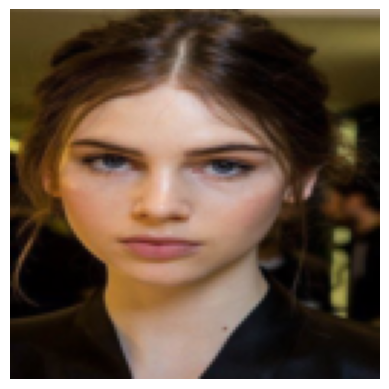

torch.Size([1, 1, 128, 128])


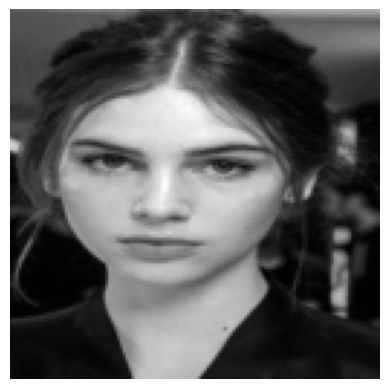

loss [0.032749149948358536] == 0.0327


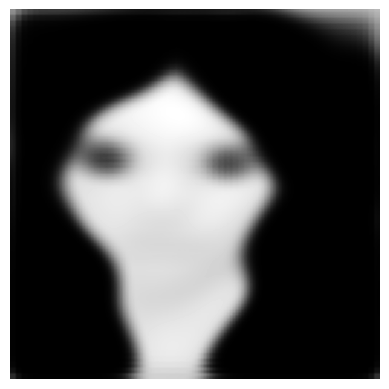

loss [0.013114163652062416] == 0.0131


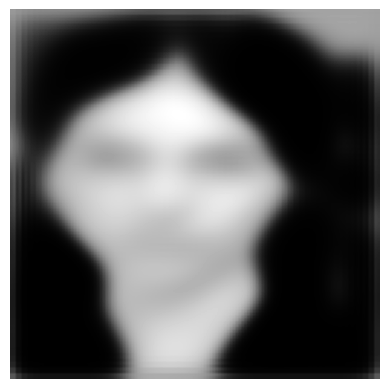

loss [0.010655359365046024] == 0.0107


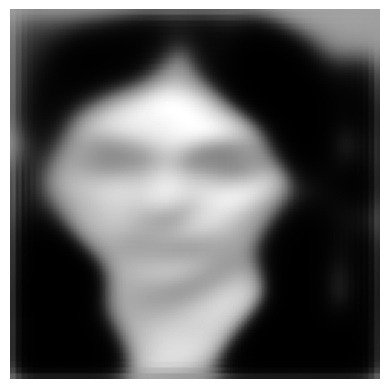

loss [0.007984009571373463] == 0.0080


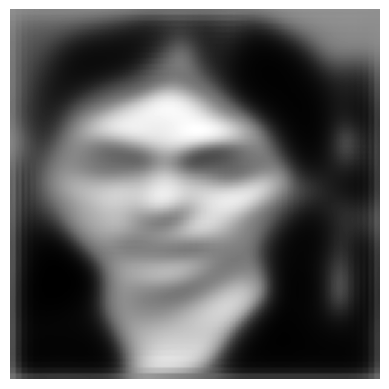

loss [0.006231098435819149] == 0.0062


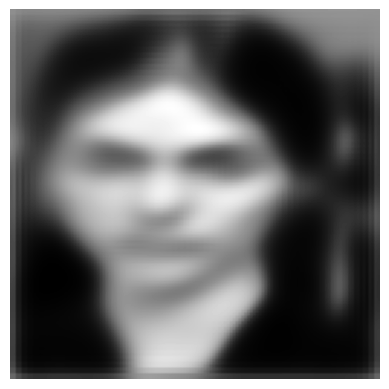

loss [0.0045202369801700115] == 0.0045


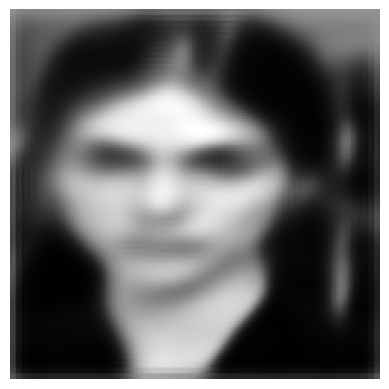

loss [0.0035916194319725037] == 0.0036


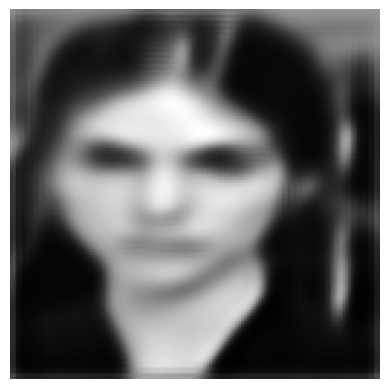

loss [0.0029439800418913364] == 0.0029


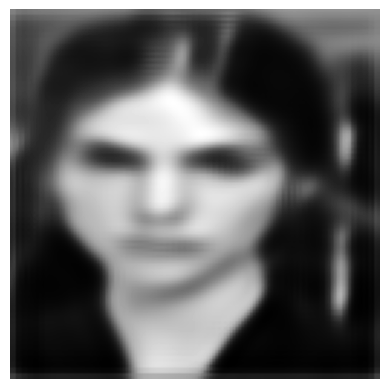

loss [0.0023266845382750034] == 0.0023


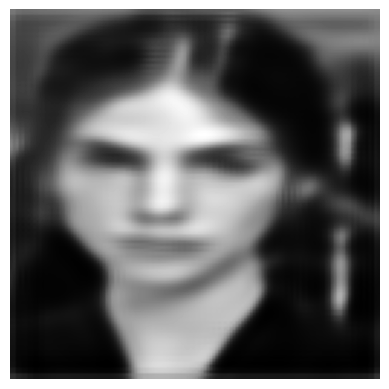

loss [0.0017547090537846088] == 0.0018


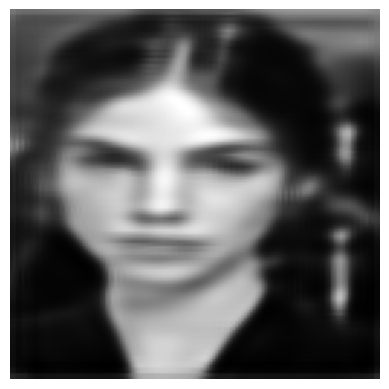

loss [0.0014391939621418715] == 0.0014


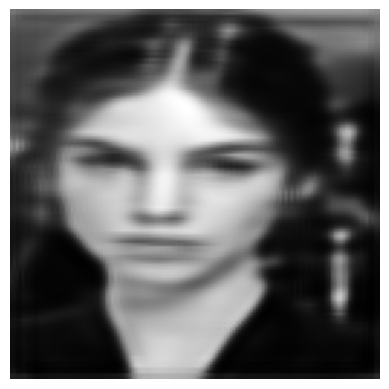

loss [0.0012089909287169576] == 0.0012


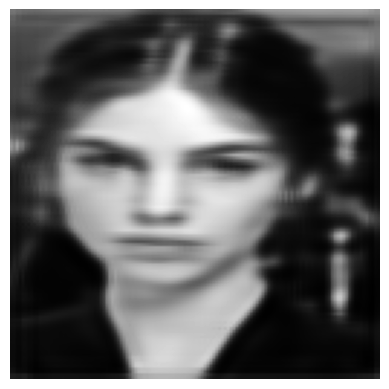

loss [0.001030262210406363] == 0.0010


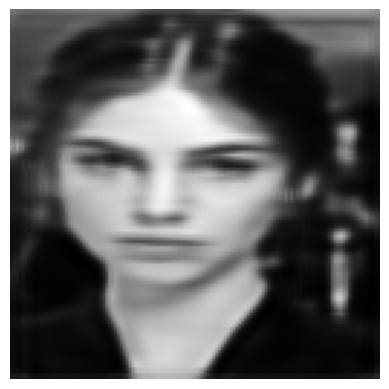

loss [0.0009026519837789237] == 0.0009


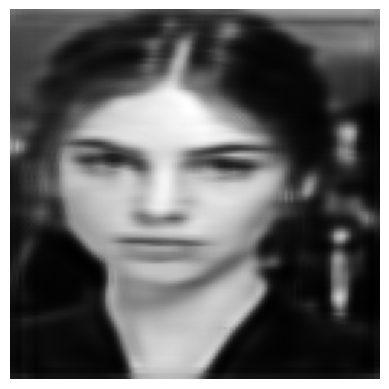

loss [0.0007929824641905725] == 0.0008


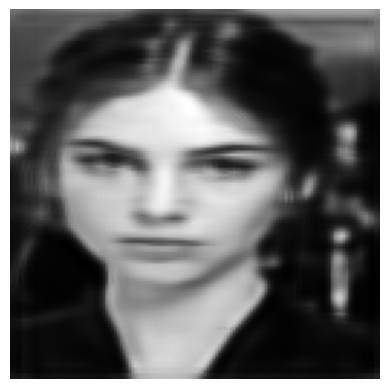

loss [0.0006986591615714133] == 0.0007


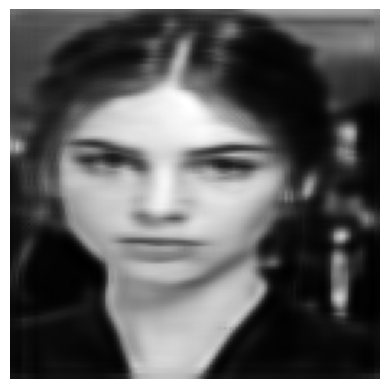

loss [0.0006158077158033848] == 0.0006


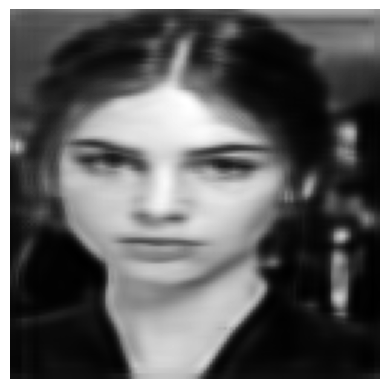

loss [0.0005377887282520533] == 0.0005


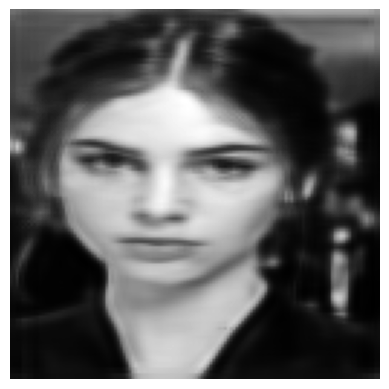

loss [0.0007002885104157031] == 0.0007


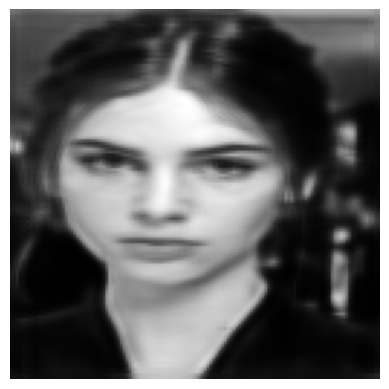

loss [0.0004576663486659527] == 0.0005


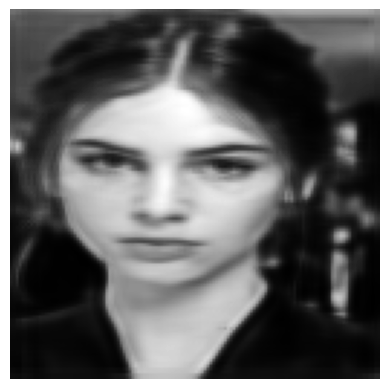

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda:4" if torch.cuda.is_available() else "cpu")

img_path = 'girl2.jpg'
img = Image.open(img_path)

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

img_tensor = transform(img).unsqueeze(0).to(device)
print(img_tensor.shape)

img_train = np.transpose(img_tensor[0], (1, 2, 0))
img_train = (img_train * 0.5) + 0.5
plt.imshow(img_train, cmap='gray')
plt.axis('off')
plt.show()

img2 = Image.open('girl2.jpg').convert('L')
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

img_test = transform(img2).unsqueeze(0).to(device)
print(img_test.shape)

img_test1 = np.transpose(img_test[0], (1, 2, 0))
plt.imshow(img_test1, cmap='gray')
plt.axis('off')
plt.show()

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv4 = nn.Conv2d(128, 1, kernel_size=5, stride=1, padding=4, dilation=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = torch.sigmoid(self.conv4(x))
        return x

model = CNN().to(device)
epochs = 200
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    model.train()
    output = model.forward(img_tensor)
    loss = criterion(output, img_test)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'loss [{loss}] == {loss:.4f}')
        output_np = output.detach().cpu().numpy()
        output_np = np.transpose(output_np[0], (1, 2, 0))
        output_np = (output_np * 0.5) + 0.5
        output_np = np.clip(output_np, 0, 1)
        plt.imshow(output_np, cmap='gray')
        plt.axis('off')
        plt.show()


## VAE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if not os.path.exists('./results'):
    os.makedirs('./results')

class VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=20):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, latent_dim)
        self.fc22 = nn.Linear(hidden_dim, latent_dim)
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item() / len(data)}')

    print(f'====> Epoch {epoch}, Average loss: {train_loss / len(train_loader.dataset)}')

    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28), f'./results/sample_{epoch}.png')

for epoch in range(1, 11):
    train(epoch)

with torch.no_grad():
    z = torch.randn(64, 20).to(device)
    sample = model.decode(z).cpu()
    save_image(sample.view(64, 1, 28, 28), './results/final_sample.png')



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 56960831.96it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1984789.85it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14224170.77it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1920997.15it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss: 549.246337890625
Epoch 1, Loss: 187.07046508789062
Epoch 1, Loss: 154.09539794921875
Epoch 1, Loss: 142.9459991455078
Epoch 1, Loss: 130.77809143066406
====> Epoch 1, Average loss: 164.51026557617186
Epoch 2, Loss: 127.12025451660156
Epoch 2, Loss: 122.47383880615234
Epoch 2, Loss: 124.24710083007812
Epoch 2, Loss: 117.58928680419922
Epoch 2, Loss: 118.42112731933594
====> Epoch 2, Average loss: 121.66206998697916
Epoch 3, Loss: 120.1126708984375
Epoch 3, Loss: 114.68486785888672
Epoch 3, Loss: 119.46414184570312
Epoch 3, Loss: 114.05852508544922
Epoch 3, Loss: 106.40384674072266
====> Epoch 3, Average loss: 114.84634256184896
Epoch 4, Loss: 111.76612854003906
Epoch 4, Loss: 116.58194732666016
Epoch 4, Loss: 110.93153381347656
Epoch 4, Loss: 109.0103530883789
Epoch 4, Loss: 109.78834533691406
====> Epoch 4, Average loss: 111.79463689778646
Epoch 5, Loss: 111.52194213867188
Epoch 5, Loss: 110.02584838867188
Epoch 5, Loss: 115.74308013916016
Epoch 5, Loss: 107.956932067871

# GAN

Epoch [0/10] | D Loss: -0.1223 | G Loss: -2.4331


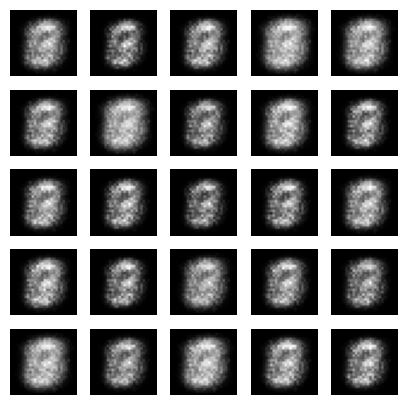

Epoch [1/10] | D Loss: -0.1195 | G Loss: -1.7455


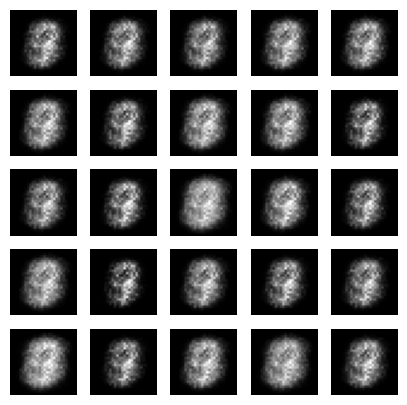

Epoch [2/10] | D Loss: -0.1767 | G Loss: -0.4146


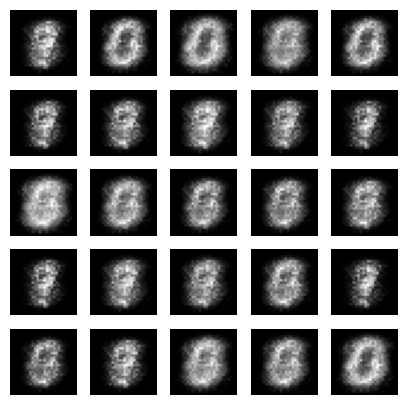

Epoch [3/10] | D Loss: -0.2328 | G Loss: -0.3977


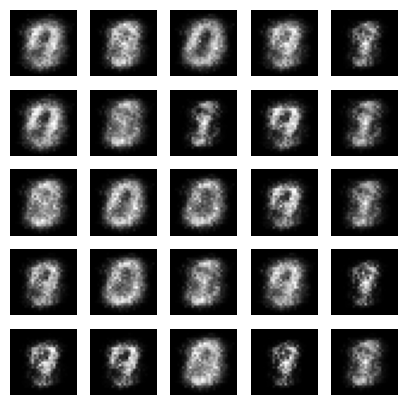

Epoch [4/10] | D Loss: -0.2245 | G Loss: -0.0683


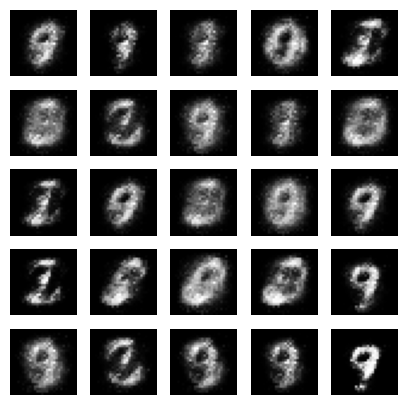

Epoch [5/10] | D Loss: -0.1589 | G Loss: -0.1030


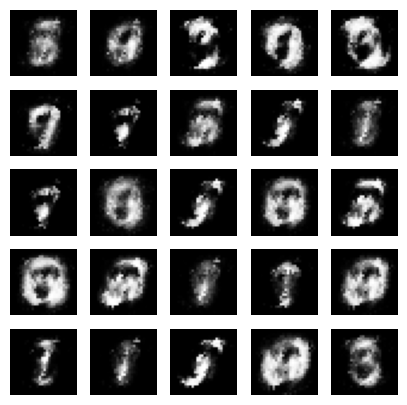

Epoch [6/10] | D Loss: -0.1388 | G Loss: -0.6876


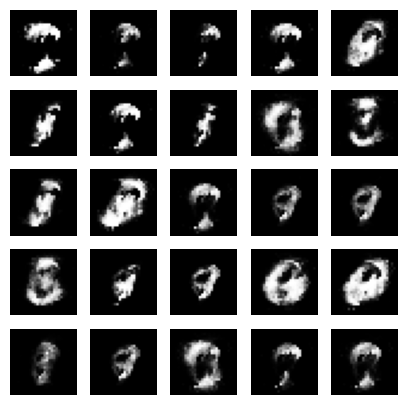

Epoch [7/10] | D Loss: -0.2394 | G Loss: -0.0408


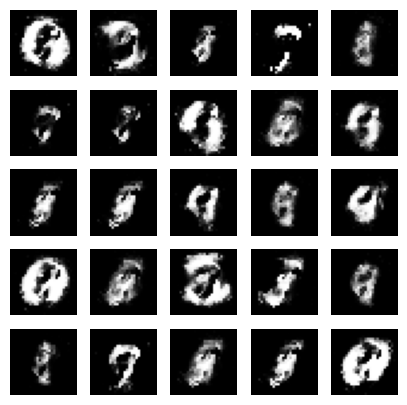

Epoch [8/10] | D Loss: -0.1713 | G Loss: 0.0503


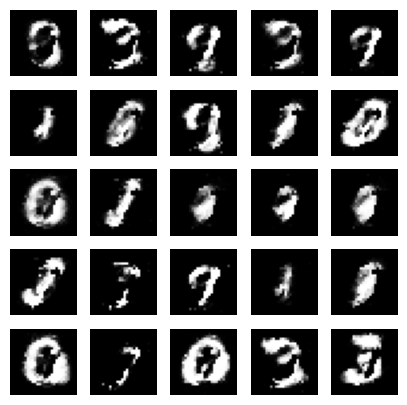

Epoch [9/10] | D Loss: -0.1470 | G Loss: 0.1213


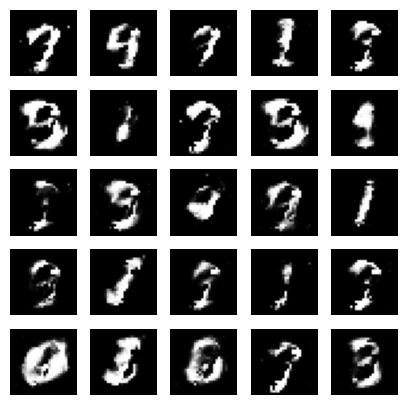

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

latent_dim = 100
img_shape = (1, 28, 28)
lr = 0.00005
n_critic = 5
clip_value = 0.01
batch_size = 64
epochs = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, int(torch.prod(torch.tensor(img_shape))))
        self.activation = nn.Tanh()

    def forward(self, z):
        x = torch.relu(self.fc1(z))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        img = self.activation(self.fc4(x)).view(x.size(0), *img_shape)
        return img

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(int(torch.prod(torch.tensor(img_shape))), 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, img):
        x = img.view(img.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        validity = self.fc4(x)
        return validity

generator = Generator().to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.RMSprop(generator.parameters(), lr=lr)
optimizer_D = optim.RMSprop(discriminator.parameters(), lr=lr)

def clip_weights(model):
    for p in model.parameters():
        p.data.clamp_(-clip_value, clip_value)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

def generate_and_save_images(generator, epoch, latent_dim, device, num_images=25):
    generator.eval()
    z = Variable(torch.randn(num_images, latent_dim)).to(device)
    fake_images = generator(z)
    fake_images = (fake_images + 1) / 2.0
    fake_images = fake_images.cpu().detach().numpy()
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        img = fake_images[i].squeeze()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.savefig(f"generated_images_epoch_{epoch}.png")
    plt.show()

for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = Variable(imgs.type(torch.FloatTensor)).to(device)
        batch_size = real_imgs.size(0)

        for _ in range(n_critic):
            z = Variable(torch.randn(batch_size, latent_dim)).to(device)
            fake_imgs = generator(z)
            real_validity = discriminator(real_imgs)
            fake_validity = discriminator(fake_imgs)
            d_loss = -torch.mean(real_validity) + torch.mean(fake_validity)
            optimizer_D.zero_grad()
            d_loss.backward()
            optimizer_D.step()
            clip_weights(discriminator)

        z = Variable(torch.randn(batch_size, latent_dim)).to(device)
        fake_imgs = generator(z)
        fake_validity = discriminator(fake_imgs)
        g_loss = -torch.mean(fake_validity)
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")
    if epoch % 1 == 0 or epoch == epochs - 1:
        generate_and_save_images(generator, epoch, latent_dim, device)


Using device: cpu
torch.Size([1, 3, 128, 128])
Epoch [1/100] | D Loss: -8.1122 | G Loss: 0.1302


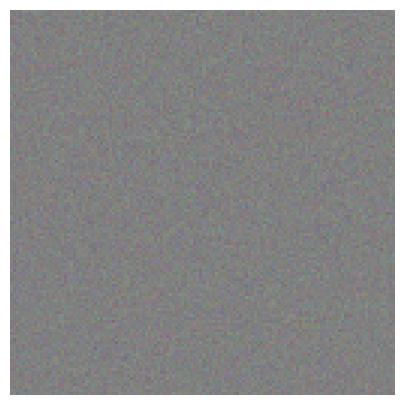

Epoch [2/100] | D Loss: -26.8427 | G Loss: -0.0361
Epoch [3/100] | D Loss: -52.6517 | G Loss: -2.0910
Epoch [4/100] | D Loss: -79.3364 | G Loss: -3.3953
Epoch [5/100] | D Loss: -109.6967 | G Loss: -8.8895
Epoch [6/100] | D Loss: -138.4642 | G Loss: -15.6954
Epoch [7/100] | D Loss: -166.8241 | G Loss: -22.0328
Epoch [8/100] | D Loss: -186.9419 | G Loss: -33.0799
Epoch [9/100] | D Loss: -216.4948 | G Loss: -52.1686
Epoch [10/100] | D Loss: -242.8399 | G Loss: -40.3825
Epoch [11/100] | D Loss: -239.6392 | G Loss: -48.3289


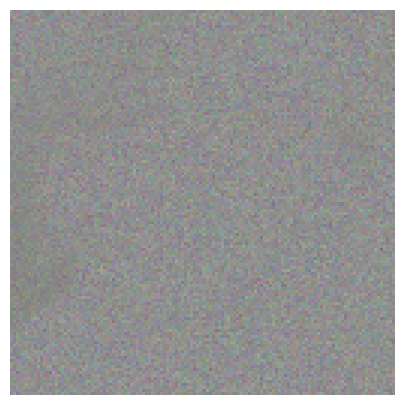

Epoch [12/100] | D Loss: -249.6755 | G Loss: -82.2226
Epoch [13/100] | D Loss: -296.6949 | G Loss: -79.4607
Epoch [14/100] | D Loss: -306.4082 | G Loss: -130.9571
Epoch [15/100] | D Loss: -288.3497 | G Loss: -129.9606
Epoch [16/100] | D Loss: -312.8147 | G Loss: -138.7680
Epoch [17/100] | D Loss: -262.7773 | G Loss: -161.8931
Epoch [18/100] | D Loss: -293.7096 | G Loss: -200.3075
Epoch [19/100] | D Loss: -279.2391 | G Loss: -221.5409
Epoch [20/100] | D Loss: -281.3829 | G Loss: -187.0229
Epoch [21/100] | D Loss: -278.2984 | G Loss: -295.7276


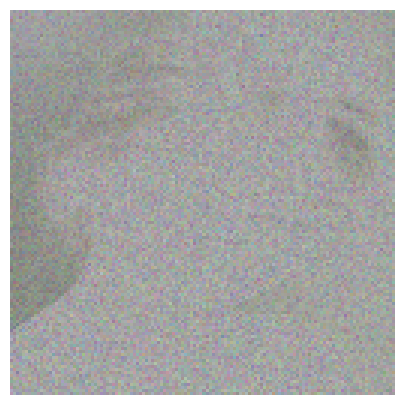

Epoch [22/100] | D Loss: -257.0158 | G Loss: -247.4109
Epoch [23/100] | D Loss: -281.8074 | G Loss: -256.0493
Epoch [24/100] | D Loss: -326.9174 | G Loss: -285.0485
Epoch [25/100] | D Loss: -295.9003 | G Loss: -316.6289
Epoch [26/100] | D Loss: -240.0797 | G Loss: -404.9293
Epoch [27/100] | D Loss: -138.9604 | G Loss: -346.0483
Epoch [28/100] | D Loss: -160.7625 | G Loss: -305.1589
Epoch [29/100] | D Loss: -209.9025 | G Loss: -290.9093
Epoch [30/100] | D Loss: -140.9728 | G Loss: -401.0436
Epoch [31/100] | D Loss: -196.9305 | G Loss: -388.3159


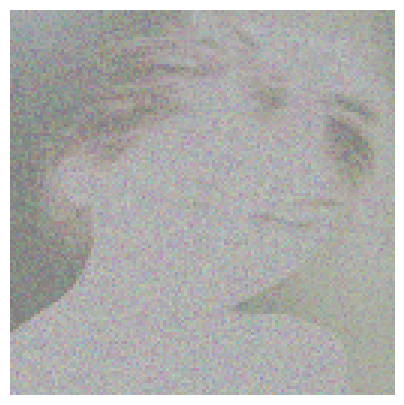

Epoch [32/100] | D Loss: -195.9195 | G Loss: -445.2213
Epoch [33/100] | D Loss: -233.8406 | G Loss: -377.6171
Epoch [34/100] | D Loss: -214.0952 | G Loss: -343.9730
Epoch [35/100] | D Loss: -88.2990 | G Loss: -274.8538
Epoch [36/100] | D Loss: -147.4218 | G Loss: -366.7598
Epoch [37/100] | D Loss: -126.9597 | G Loss: -403.5418
Epoch [38/100] | D Loss: -215.1083 | G Loss: -437.5064
Epoch [39/100] | D Loss: -114.7127 | G Loss: -351.0834
Epoch [40/100] | D Loss: -168.6953 | G Loss: -489.2393
Epoch [41/100] | D Loss: -120.6570 | G Loss: -374.7885


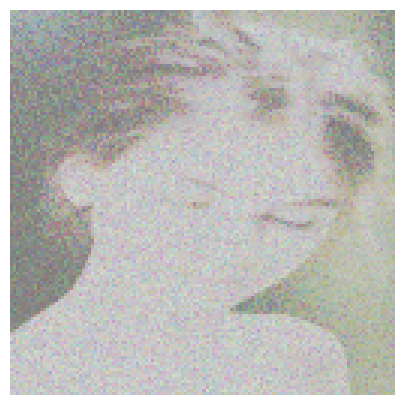

Epoch [42/100] | D Loss: -126.6821 | G Loss: -361.4528
Epoch [43/100] | D Loss: -63.0163 | G Loss: -489.1451
Epoch [44/100] | D Loss: -106.1835 | G Loss: -488.6124
Epoch [45/100] | D Loss: -76.5297 | G Loss: -392.4733
Epoch [46/100] | D Loss: -66.6632 | G Loss: -404.3772
Epoch [47/100] | D Loss: -77.8835 | G Loss: -501.0521
Epoch [48/100] | D Loss: -77.1873 | G Loss: -360.8710
Epoch [49/100] | D Loss: -78.5890 | G Loss: -444.2638
Epoch [50/100] | D Loss: -29.7350 | G Loss: -393.5222
Epoch [51/100] | D Loss: -57.3954 | G Loss: -449.2896


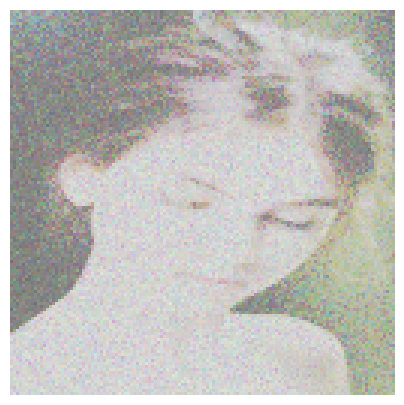

Epoch [52/100] | D Loss: -136.5978 | G Loss: -377.3184
Epoch [53/100] | D Loss: -46.7604 | G Loss: -454.5922
Epoch [54/100] | D Loss: -19.9710 | G Loss: -398.5620
Epoch [55/100] | D Loss: -36.4152 | G Loss: -417.7333
Epoch [56/100] | D Loss: -70.6904 | G Loss: -304.7336
Epoch [57/100] | D Loss: -70.0321 | G Loss: -401.4099
Epoch [58/100] | D Loss: -78.1397 | G Loss: -359.0721
Epoch [59/100] | D Loss: -23.3629 | G Loss: -269.2103
Epoch [60/100] | D Loss: -76.1194 | G Loss: -275.0155
Epoch [61/100] | D Loss: -23.4872 | G Loss: -389.3464


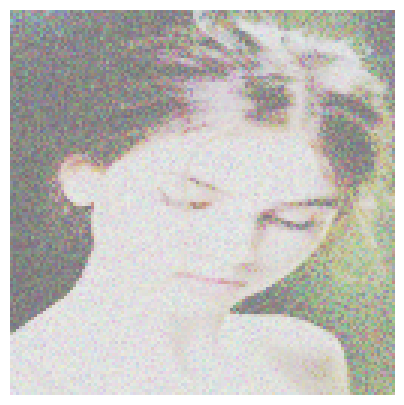

Epoch [62/100] | D Loss: -18.9102 | G Loss: -321.7577
Epoch [63/100] | D Loss: -32.1521 | G Loss: -293.7697
Epoch [64/100] | D Loss: -36.4861 | G Loss: -350.5062
Epoch [65/100] | D Loss: -17.9592 | G Loss: -318.6985
Epoch [66/100] | D Loss: -60.3961 | G Loss: -280.5560
Epoch [67/100] | D Loss: -41.3701 | G Loss: -276.7557
Epoch [68/100] | D Loss: -6.0585 | G Loss: -287.1735
Epoch [69/100] | D Loss: -47.5507 | G Loss: -298.5208
Epoch [70/100] | D Loss: 13.3921 | G Loss: -270.6162
Epoch [71/100] | D Loss: 9.3021 | G Loss: -296.1698


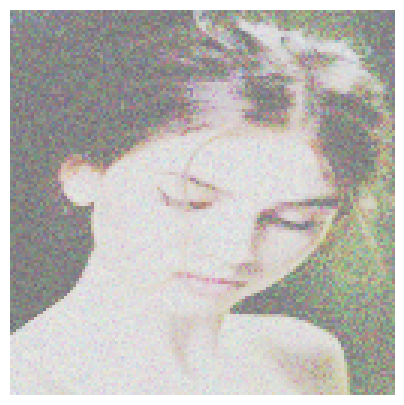

Epoch [72/100] | D Loss: -9.2909 | G Loss: -267.9807
Epoch [73/100] | D Loss: 3.1067 | G Loss: -261.3641
Epoch [74/100] | D Loss: -3.4827 | G Loss: -233.6375
Epoch [75/100] | D Loss: -3.1999 | G Loss: -247.3976
Epoch [76/100] | D Loss: -8.0632 | G Loss: -237.2845
Epoch [77/100] | D Loss: -13.9177 | G Loss: -242.1191
Epoch [78/100] | D Loss: -9.2831 | G Loss: -210.2421
Epoch [79/100] | D Loss: -38.5541 | G Loss: -208.5387
Epoch [80/100] | D Loss: -6.5628 | G Loss: -175.6800
Epoch [81/100] | D Loss: -14.8395 | G Loss: -185.8662


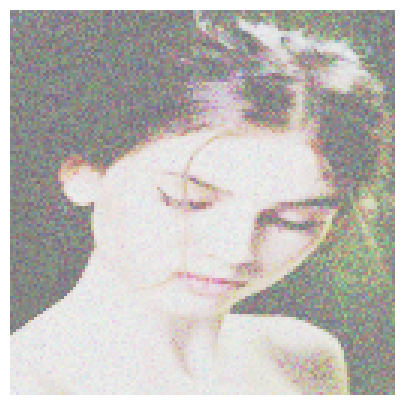

Epoch [82/100] | D Loss: -13.9442 | G Loss: -201.4812
Epoch [83/100] | D Loss: -0.8382 | G Loss: -188.7330
Epoch [84/100] | D Loss: -7.7905 | G Loss: -184.3999
Epoch [85/100] | D Loss: -11.1752 | G Loss: -173.0211
Epoch [86/100] | D Loss: -22.2109 | G Loss: -157.7851
Epoch [87/100] | D Loss: -10.7222 | G Loss: -153.0784
Epoch [88/100] | D Loss: -10.2507 | G Loss: -140.7687
Epoch [89/100] | D Loss: -9.7844 | G Loss: -133.8741
Epoch [90/100] | D Loss: -14.6420 | G Loss: -132.5319
Epoch [91/100] | D Loss: -12.0570 | G Loss: -114.6404


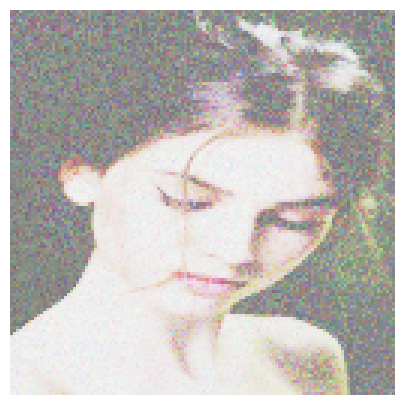

Epoch [92/100] | D Loss: -12.4580 | G Loss: -110.5145
Epoch [93/100] | D Loss: -14.8143 | G Loss: -100.6346
Epoch [94/100] | D Loss: -17.1229 | G Loss: -90.8309
Epoch [95/100] | D Loss: -16.4669 | G Loss: -81.1777
Epoch [96/100] | D Loss: -16.6285 | G Loss: -73.9111
Epoch [97/100] | D Loss: -14.1236 | G Loss: -66.6419
Epoch [98/100] | D Loss: -22.2020 | G Loss: -43.7136
Epoch [99/100] | D Loss: -20.3971 | G Loss: -31.5058
Epoch [100/100] | D Loss: -35.9212 | G Loss: -32.0620


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision.utils import save_image
import torch.nn.functional as F
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

img_path = 'girl2.jpg'
img = Image.open('girl2.jpg')

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

img_test = transform(img).unsqueeze(0).to(device)
print(img_test.shape)

z_dim = 100
epochs = 100
n_critic = 5
clip_value = 0.01
lr = 0.00005
batch_size = 1

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 3 * 128 * 128),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 3, 128, 128)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3 * 128 * 128, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        return self.model(x.view(-1, 3 * 128 * 128))

generator = Generator().to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.RMSprop(generator.parameters(), lr=lr)
optimizer_D = optim.RMSprop(discriminator.parameters(), lr=lr)

def clip_weights(model):
    for p in model.parameters():
        p.data.clamp_(-clip_value, clip_value)

def generate_and_save_images(generator, epoch, latent_dim, num_images=1):
    generator.eval()
    with torch.no_grad():
        z = torch.randn(num_images, latent_dim).to(device)
        fake_images = generator(z)
        fake_images = (fake_images + 1) / 2.0
        fake_images = fake_images.cpu()
        plt.figure(figsize=(5, 5))
        img = fake_images[0].permute(1, 2, 0).numpy()
        plt.imshow(img)
        plt.axis('off')
        plt.savefig(f"generated_images_epoch_{epoch}.png")
        plt.show()

for epoch in range(epochs):
    real_imgs = img_test

    for _ in range(n_critic):
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = generator(z)
        real_validity = discriminator(real_imgs)
        fake_validity = discriminator(fake_imgs)
        d_loss = -torch.mean(real_validity) + torch.mean(fake_validity)
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()
        clip_weights(discriminator)

    z = torch.randn(batch_size, z_dim).to(device)
    fake_imgs = generator(z)
    fake_validity = discriminator(fake_imgs)
    g_loss = -torch.mean(fake_validity)
    optimizer_G.zero_grad()
    g_loss.backward()
    optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    if epoch % 10 == 0:
        generate_and_save_images(generator, epoch, z_dim)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 82.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 7.81MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 45.3MB/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.14MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [0/10] | D Loss: -0.1806 | G Loss: -2.5583


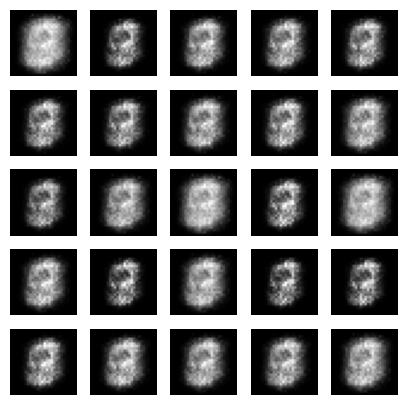

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Հիպերպարամետրեր
latent_dim = 100
img_shape = (1, 28, 28) #նկարի չափերը
lr = 0.00005 #ուսուցման արագություն
n_critic = 5 #5 անգամ discriminator ուսուցանելու համար
clip_value = 0.01 #գրադիենտի հաշվարկի սահմանափակիչ միավոր
batch_size = 64 #նկարների քանակ որը տրվում է ցանցին
epochs = 10 #դասերի քանակ

# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 128) #1x128
        self.fc2 = nn.Linear(128, 256) #1x256
        self.fc3 = nn.Linear(256, 512) #1x512
        self.fc4 = nn.Linear(512, 784) #1x784
        self.activation = nn.Tanh()    #ակտիվացման ֆունկցիա

    def forward(self, z):
        x = torch.relu(self.fc1(z)) #1x128
        x = torch.relu(self.fc2(x)) #1x256
        x = torch.relu(self.fc3(x)) #1x512
        img = self.activation(self.fc4(x)).view(x.size(0), *img_shape) #1x784 սարքում է 1x28x28
        return img

# Discriminator (Critic) model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 512) #1x512
        self.fc2 = nn.Linear(512, 256) #1x256
        self.fc3 = nn.Linear(256, 128) #1x128
        self.fc4 = nn.Linear(128, 1) #1x1

    def forward(self, img):
        x = img.view(img.size(0), -1) #1x28x28 սարքում 1x784
        x = torch.relu(self.fc1(x)) #1x512
        x = torch.relu(self.fc2(x)) #1x256
        x = torch.relu(self.fc3(x)) #1x128
        validity = self.fc4(x) #1x1 ենք սարքում որը կասի նկարը իրականա թե կեղծ
        return validity

# generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
optimizer_G = optim.RMSprop(generator.parameters(), lr=lr)
optimizer_D = optim.RMSprop(discriminator.parameters(), lr=lr)

# Կշիռների clipping ենք անում որ շատ մեծ չլինեն:Լինեն (-0.01,-0.01) միջակայքում
def clip_weights(model):
    for p in model.parameters():
        p.data.clamp_(-clip_value, clip_value)

# DataLoader նկարները մատրից ենք սարքում ամենք պիքսելում թիվ է գրած
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Նորմալիզացիա ենք անում (-1,1) շրջակայք
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Ֆունկցիա գեներացրած նկարները պահելու համար
def generate_and_save_images(generator, epoch, latent_dim, device, num_images=25, save_path=None):
    generator.eval()
    z = Variable(torch.randn(num_images, latent_dim)).to(device)
    fake_images = generator(z)
    fake_images = (fake_images + 1) / 2.0
    fake_images = fake_images.cpu().detach().numpy()
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        img = fake_images[i].squeeze()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    if save_path:
        plt.savefig(save_path)
    plt.show()

# ֆունկցիա վիզուալիզցնելու իրական նկարները
def visualize_real_images(data_loader, num_images=25):
    data_iter = iter(data_loader)
    imgs, _ = next(data_iter)
    imgs = imgs[:num_images]
    imgs = (imgs + 1) / 2.0
    imgs = imgs.numpy()
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        img = imgs[i].squeeze()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

# Training loop
g_losses, d_losses = [], []
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = Variable(imgs.type(torch.FloatTensor)).to(device) #իրական նկարներ
        batch_size = real_imgs.size(0) #ամեն անգամ ցանցին տրվումա 64 նկար

        # Train Discriminator
        for _ in range(n_critic):
            z = Variable(torch.randn(batch_size, latent_dim)).to(device) # 1x100 չափի վեկտոր ենք գեներացնում
            fake_imgs = generator(z) # այդ վեկտորը տալիս գեներատորին որը պետքա իրական նկարին մոտ նկար գեներացնի
            real_validity = discriminator(real_imgs) # իրական նկարն ենք տալիս դիսկրիմինատորին
            fake_validity = discriminator(fake_imgs) # կեղծ նկարն ենք տալիս դիսկրիմինատորին
            d_loss = -torch.mean(real_validity) + torch.mean(fake_validity) # կորստի ֆունկցիան
            optimizer_D.zero_grad() # ամեն քայլին հաշված գրադիենտները զրոյացվում են
            d_loss.backward() # գրադիենտի գործողությունը
            optimizer_D.step() # օպտիմայզերի քայլը որը կօպտիմիզացնի կշիռները
            clip_weights(discriminator) #կշիռները կսահմանափակի (-0.01,0.01) միջակայքում

        # Train Generator
        z = Variable(torch.randn(batch_size, latent_dim)).to(device) #1x100 պատահական վեկտոր ենք գեներացնում
        fake_imgs = generator(z) # վեկտորը տալիս գեներատորին
        fake_validity = discriminator(fake_imgs) # ֆեյք նկարը տալիս դիսկրիմինատորին
        g_loss = -torch.mean(fake_validity) # կորստի ֆունկցիան
        optimizer_G.zero_grad() #ամեն քայլին հաշված գրադիենտները զրոյացվում են
        g_loss.backward() #գրադիենտի գործողությունը
        optimizer_G.step() #օպտիմայզերի քայլը որը կօպտիմիզացնի կշիռները

    g_losses.append(g_loss.item())
    d_losses.append(d_loss.item())
    print(f"Epoch [{epoch}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    if epoch % 1 == 0 or epoch == epochs - 1:
        generate_and_save_images(generator, epoch, latent_dim, device, save_path=f"generated_images_epoch_{epoch}.png")

# Plot generator and discriminator losses
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Generator and Discriminator Losses")
plt.show()

# Test the generator
def test_generator(generator, latent_dim, device, num_images=25, save_path="test_generated_images.png"):
    generator.eval()
    z = Variable(torch.randn(num_images, latent_dim)).to(device)
    fake_images = generator(z)
    fake_images = (fake_images + 1) / 2.0
    fake_images = fake_images.cpu().detach().numpy()
    plt.figure(figsize=(5, 5))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        img = fake_images[i].squeeze()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.savefig(save_path)
    plt.show()

# Visualize real images
visualize_real_images(train_loader, num_images=25)

# Test the generator
test_generator(generator, latent_dim, device, num_images=25, save_path="test_generated_images.png")


Using device: cpu
torch.Size([1, 3, 128, 128])
Epoch [1/100] | D Loss: -8.9990 | G Loss: 0.1323


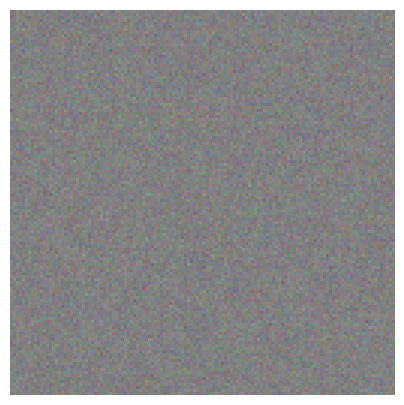

Epoch [2/100] | D Loss: -31.4214 | G Loss: -0.0575
Epoch [3/100] | D Loss: -62.8788 | G Loss: -1.2887
Epoch [4/100] | D Loss: -99.8873 | G Loss: -4.2905
Epoch [5/100] | D Loss: -138.3902 | G Loss: -8.2132
Epoch [6/100] | D Loss: -179.5492 | G Loss: -8.9801
Epoch [7/100] | D Loss: -218.1319 | G Loss: -20.5986
Epoch [8/100] | D Loss: -255.1106 | G Loss: -23.3105
Epoch [9/100] | D Loss: -283.0595 | G Loss: -53.0208
Epoch [10/100] | D Loss: -307.4720 | G Loss: -51.7344
Epoch [11/100] | D Loss: -360.9340 | G Loss: -62.7620


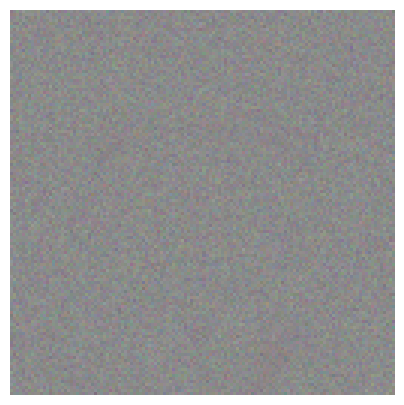

Epoch [12/100] | D Loss: -369.3801 | G Loss: -88.3039
Epoch [13/100] | D Loss: -396.9781 | G Loss: -101.9691
Epoch [14/100] | D Loss: -414.1805 | G Loss: -92.8031
Epoch [15/100] | D Loss: -402.8862 | G Loss: -105.0808
Epoch [16/100] | D Loss: -435.3228 | G Loss: -118.6393
Epoch [17/100] | D Loss: -410.2920 | G Loss: -176.2548
Epoch [18/100] | D Loss: -478.8450 | G Loss: -172.4861
Epoch [19/100] | D Loss: -422.1396 | G Loss: -186.5716
Epoch [20/100] | D Loss: -411.1577 | G Loss: -204.7907
Epoch [21/100] | D Loss: -441.3981 | G Loss: -239.1283


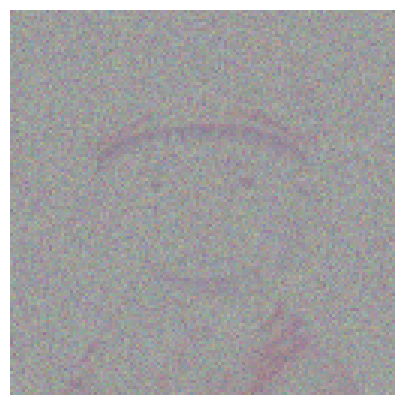

Epoch [22/100] | D Loss: -444.7536 | G Loss: -238.5375
Epoch [23/100] | D Loss: -442.1725 | G Loss: -365.9761
Epoch [24/100] | D Loss: -383.9304 | G Loss: -244.6168
Epoch [25/100] | D Loss: -456.7560 | G Loss: -296.1702
Epoch [26/100] | D Loss: -421.7184 | G Loss: -302.2662
Epoch [27/100] | D Loss: -273.9780 | G Loss: -374.7825
Epoch [28/100] | D Loss: -432.1991 | G Loss: -383.7489
Epoch [29/100] | D Loss: -320.3541 | G Loss: -388.2177
Epoch [30/100] | D Loss: -356.9209 | G Loss: -514.9854
Epoch [31/100] | D Loss: -187.9608 | G Loss: -552.6559


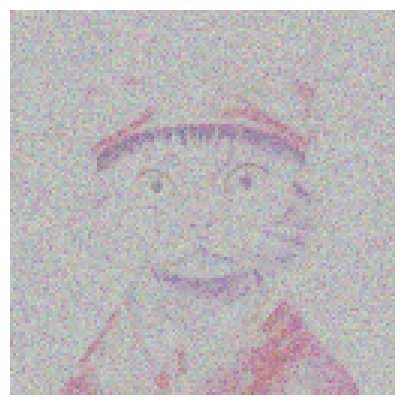

Epoch [32/100] | D Loss: -448.3927 | G Loss: -493.8065
Epoch [33/100] | D Loss: -190.3007 | G Loss: -523.7929
Epoch [34/100] | D Loss: -381.5926 | G Loss: -458.4646
Epoch [35/100] | D Loss: -297.7125 | G Loss: -509.2177
Epoch [36/100] | D Loss: -114.1893 | G Loss: -563.3956
Epoch [37/100] | D Loss: -183.3895 | G Loss: -646.6301
Epoch [38/100] | D Loss: -147.9666 | G Loss: -573.2993
Epoch [39/100] | D Loss: -108.4648 | G Loss: -638.9654
Epoch [40/100] | D Loss: -135.1439 | G Loss: -637.7374
Epoch [41/100] | D Loss: -275.5598 | G Loss: -621.0442


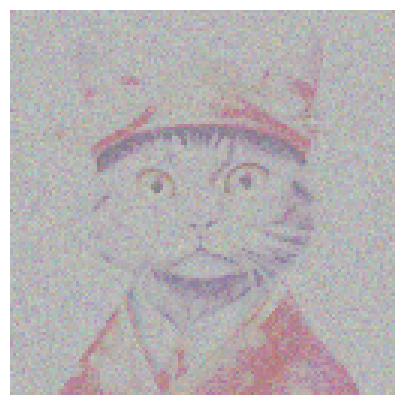

Epoch [42/100] | D Loss: -168.1428 | G Loss: -634.2078
Epoch [43/100] | D Loss: -254.5524 | G Loss: -904.1715
Epoch [44/100] | D Loss: -3.4395 | G Loss: -694.5392
Epoch [45/100] | D Loss: -149.4879 | G Loss: -772.9497
Epoch [46/100] | D Loss: -72.2914 | G Loss: -752.5663
Epoch [47/100] | D Loss: -95.8262 | G Loss: -729.1547
Epoch [48/100] | D Loss: -71.9716 | G Loss: -894.5054
Epoch [49/100] | D Loss: -181.9260 | G Loss: -740.6622
Epoch [50/100] | D Loss: -197.8472 | G Loss: -877.9820
Epoch [51/100] | D Loss: -202.0511 | G Loss: -665.3958


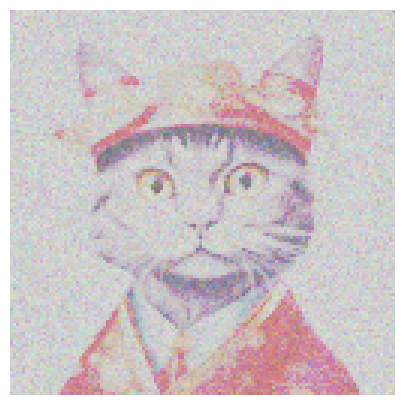

Epoch [52/100] | D Loss: -36.3001 | G Loss: -869.8470
Epoch [53/100] | D Loss: -210.7253 | G Loss: -769.8724
Epoch [54/100] | D Loss: -55.5621 | G Loss: -778.8181
Epoch [55/100] | D Loss: 0.1783 | G Loss: -888.7102
Epoch [56/100] | D Loss: -7.7476 | G Loss: -753.9285
Epoch [57/100] | D Loss: -150.2920 | G Loss: -702.8439
Epoch [58/100] | D Loss: 86.2846 | G Loss: -646.4080
Epoch [59/100] | D Loss: 45.6081 | G Loss: -702.7271
Epoch [60/100] | D Loss: -52.0746 | G Loss: -626.8232
Epoch [61/100] | D Loss: 17.0898 | G Loss: -734.6415


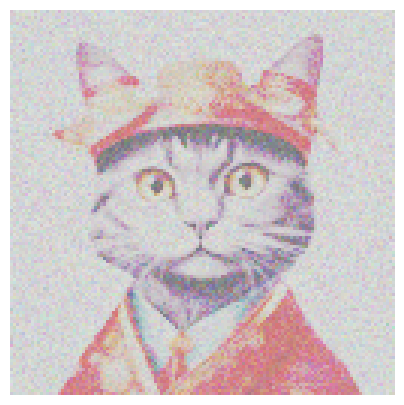

Epoch [62/100] | D Loss: -37.2730 | G Loss: -614.3230
Epoch [63/100] | D Loss: 56.6630 | G Loss: -717.2304
Epoch [64/100] | D Loss: -161.4243 | G Loss: -624.1107
Epoch [65/100] | D Loss: -0.9636 | G Loss: -567.7452
Epoch [66/100] | D Loss: 30.5631 | G Loss: -572.9341
Epoch [67/100] | D Loss: -46.5787 | G Loss: -601.4811
Epoch [68/100] | D Loss: 29.9844 | G Loss: -548.2089
Epoch [69/100] | D Loss: -17.3276 | G Loss: -560.4306
Epoch [70/100] | D Loss: 36.8586 | G Loss: -576.0936
Epoch [71/100] | D Loss: 44.2562 | G Loss: -561.2500


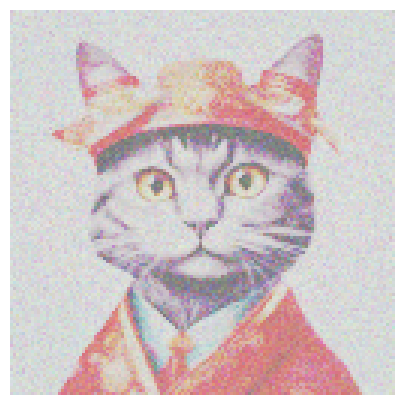

Epoch [72/100] | D Loss: 61.8842 | G Loss: -507.5597
Epoch [73/100] | D Loss: 31.3471 | G Loss: -483.9753
Epoch [74/100] | D Loss: -74.6334 | G Loss: -498.7457
Epoch [75/100] | D Loss: 30.5764 | G Loss: -424.2205
Epoch [76/100] | D Loss: -29.3979 | G Loss: -446.5105
Epoch [77/100] | D Loss: -88.3270 | G Loss: -411.0388
Epoch [78/100] | D Loss: -39.1933 | G Loss: -406.7771
Epoch [79/100] | D Loss: -5.2374 | G Loss: -418.2923
Epoch [80/100] | D Loss: 14.4766 | G Loss: -426.3640
Epoch [81/100] | D Loss: -3.6356 | G Loss: -367.3146


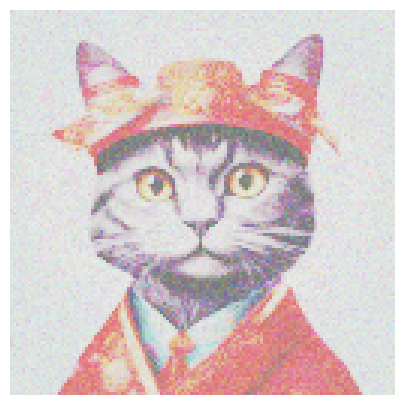

Epoch [82/100] | D Loss: 21.1850 | G Loss: -329.6415
Epoch [83/100] | D Loss: 2.4218 | G Loss: -288.2764
Epoch [84/100] | D Loss: -17.3882 | G Loss: -316.2119
Epoch [85/100] | D Loss: 23.0797 | G Loss: -297.0724
Epoch [86/100] | D Loss: 11.3646 | G Loss: -262.5945
Epoch [87/100] | D Loss: -25.7679 | G Loss: -251.3572
Epoch [88/100] | D Loss: 12.8886 | G Loss: -231.5073
Epoch [89/100] | D Loss: -32.9879 | G Loss: -234.4757
Epoch [90/100] | D Loss: -50.5892 | G Loss: -220.0143
Epoch [91/100] | D Loss: -15.6713 | G Loss: -174.9183


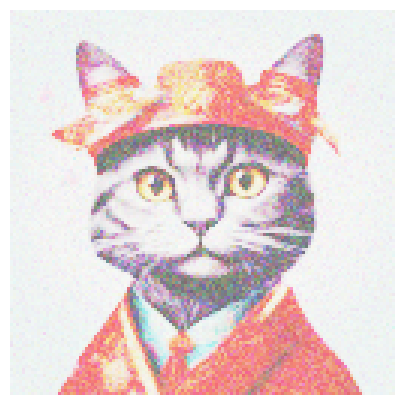

Epoch [92/100] | D Loss: -13.2092 | G Loss: -177.7579
Epoch [93/100] | D Loss: -19.9470 | G Loss: -144.9722
Epoch [94/100] | D Loss: -23.0908 | G Loss: -103.7930
Epoch [95/100] | D Loss: -41.4946 | G Loss: -101.3155
Epoch [96/100] | D Loss: -39.9114 | G Loss: -69.0965
Epoch [97/100] | D Loss: -49.0512 | G Loss: -47.4715
Epoch [98/100] | D Loss: -46.7437 | G Loss: -27.0108
Epoch [99/100] | D Loss: -51.1302 | G Loss: -7.2173
Epoch [100/100] | D Loss: -56.4167 | G Loss: 75.3918


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision.utils import save_image
import torch.nn.functional as F
import os

from PIL import Image

import matplotlib.pyplot as plt
from torchvision import transforms


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

img_path = 'cat.jpg'
img = Image.open('cat.jpg')


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

img_test = transform(img).unsqueeze(0).to(device)
print(img_test.shape)

z_dim = 100
epochs = 100
n_critic = 5
clip_value = 0.01
lr = 0.00005
batch_size = 1


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 3 * 128 * 128),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 3, 128, 128)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3 * 128 * 128, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        return self.model(x.view(-1, 3 * 128 * 128))

generator = Generator().to(device)
discriminator = Discriminator().to(device)


optimizer_G = optim.RMSprop(generator.parameters(), lr=lr)
optimizer_D = optim.RMSprop(discriminator.parameters(), lr=lr)

def clip_weights(model):
    for p in model.parameters():
        p.data.clamp_(-clip_value, clip_value)

def generate_and_save_images(generator, epoch, latent_dim, num_images=1):
    generator.eval()
    with torch.no_grad():
        z = torch.randn(num_images, latent_dim).to(device)
        fake_images = generator(z)
        fake_images = (fake_images + 1) / 2.0


        fake_images = fake_images.cpu()


        plt.figure(figsize=(5, 5))
        img = fake_images[0].permute(1, 2, 0).numpy()
        plt.imshow(img)
        plt.axis('off')
        plt.savefig(f"generated_images_epoch_{epoch}.png")
        plt.show()

for epoch in range(epochs):
    real_imgs = img_test


    for _ in range(n_critic):
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = generator(z)

        real_validity = discriminator(real_imgs)
        fake_validity = discriminator(fake_imgs)

        d_loss = -torch.mean(real_validity) + torch.mean(fake_validity)

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()


        clip_weights(discriminator)


    z = torch.randn(batch_size, z_dim).to(device)
    fake_imgs = generator(z)
    fake_validity = discriminator(fake_imgs)

    g_loss = -torch.mean(fake_validity)

    optimizer_G.zero_grad()
    g_loss.backward()
    optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


    if epoch % 10 == 0:
        generate_and_save_images(generator, epoch, z_dim)
